# Regression models for Flights dataset
#### by Jérôme d'Harveng

<a id='table'></a>
## Table of Contents
<ul>
<li><a href="#data_prepa">Data preparation</a></li>
<li><a href="#model_training_WN">Model training _ Carrier = WN</a></li>
<li><a href="#feature_engineering">Feature Engineering</a></li>
<li><a href="#feature_selection">Feature selection</a></li>

## Loading dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df_regression =  pd.read_csv('df_flights_regression.csv', sep=",", encoding='utf_8', low_memory=False)

<a id='data_prepa'></a>
## Data Preparation

In [3]:
df_regression.head(2)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_HOUR,ARR_HOUR,UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,CRS_ARR_TIME,ARR_DELAY,AIR_TIME,DISTANCE
0,1,6,3,11,14,AA,11298,11433,1100,1438,-6,132,986
1,1,7,4,11,14,AA,11298,11433,1100,1438,-12,126,986


In [4]:
df_regression[['UNIQUE_CARRIER','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_HOUR', 'ARR_HOUR',
                                     'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID']]=\
df_regression[['UNIQUE_CARRIER','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_HOUR', 'ARR_HOUR',
                                     'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID']].astype('category')

##### Test

In [5]:
df_regression.DAY_OF_WEEK.dtypes

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7], ordered=False)

In [6]:
df_regression.shape

(5622168, 13)

### Conversion to Dummie variables

In [7]:
df_dummies = pd.get_dummies(df_regression[['UNIQUE_CARRIER','MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'DEP_HOUR', 
                                           'ARR_HOUR', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID']])

In [8]:
df_dummies.shape

(5622168, 733)

#### Putting dummy variable and numerical variable together

In [9]:
df_cat_num = df_dummies.copy()

In [ ]:
df_cat_num['DISTANCE'] = df_regression['DISTANCE']

In [ ]:
df_cat_num['ARR_DELAY'] = df_regression['ARR_DELAY']

> in order to being able to split by carrier, we'll add the UNIQUE_CARRIER series to df_dummies

In [ ]:
df_cat_num['UNIQUE_CARRIER'] = df_regression['UNIQUE_CARRIER']

In [ ]:
df_cat_num.shape

(5622168, 736)

### First separate Numerical data from Categorical data

### Apply regression per Carrier

> After having tried to apply the regression to the whole database at once and facing memory issues. We try now to apply it separately for each Carrier.

#### Separate the Dataframe according to the different carriers

In [ ]:
carrier_list = ["WN","DL","AA","OO","UA","EV","B6","AS","NK","F9","HA","VX"]

In [ ]:
dico_carrier_df = {}
for carrier in carrier_list:
    # creating a dataframe and inserting it in the dictionnary
    dico_carrier_df[carrier]=pd.DataFrame()
    # Setting part of the main df corresponding to flights of specific carrier
    dico_carrier_df[carrier]=df_cat_num.query('UNIQUE_CARRIER == @carrier')

##### Test

In [ ]:
sum_df = 0
for carrier_abr,df_car in dico_carrier_df.items():
    print(carrier_abr , df_car.shape[0] )
    sum_df = sum_df + df_car.shape[0]
sum_df == df_regression.shape[0]

WN 1293796
DL 968965
AA 883877
OO 602375
UA 543660
EV 501702
B6 283993
AS 166506
NK 138000
F9 95702
HA 76452
VX 67140


True

In [ ]:
dico_carrier_df['AS'].sample(3)

,UNIQUE_CARRIER_AA,UNIQUE_CARRIER_AS,UNIQUE_CARRIER_B6,UNIQUE_CARRIER_DL,UNIQUE_CARRIER_EV,UNIQUE_CARRIER_F9,UNIQUE_CARRIER_HA,UNIQUE_CARRIER_NK,UNIQUE_CARRIER_OO,UNIQUE_CARRIER_UA,...,DEST_AIRPORT_ID_15607,DEST_AIRPORT_ID_15624,DEST_AIRPORT_ID_15841,DEST_AIRPORT_ID_15897,DEST_AIRPORT_ID_15919,DEST_AIRPORT_ID_15991,DEST_AIRPORT_ID_16218,DISTANCE,ARR_DELAY,UNIQUE_CARRIER
1435693,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,672,4,AS
623429,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,954,-4,AS
1313927,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,680,-4,AS


In [ ]:
dico_carrier_df['B6'].sample(3)

,UNIQUE_CARRIER_AA,UNIQUE_CARRIER_AS,UNIQUE_CARRIER_B6,UNIQUE_CARRIER_DL,UNIQUE_CARRIER_EV,UNIQUE_CARRIER_F9,UNIQUE_CARRIER_HA,UNIQUE_CARRIER_NK,UNIQUE_CARRIER_OO,UNIQUE_CARRIER_UA,...,DEST_AIRPORT_ID_15607,DEST_AIRPORT_ID_15624,DEST_AIRPORT_ID_15841,DEST_AIRPORT_ID_15897,DEST_AIRPORT_ID_15919,DEST_AIRPORT_ID_15991,DEST_AIRPORT_ID_16218,DISTANCE,ARR_DELAY,UNIQUE_CARRIER
5367150,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,944,46,B6
2293280,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1554,-23,B6
2758124,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,793,15,B6


### Functions for datapreparation

#### Separating Training and Test Data

In [ ]:
# conversion to sparse matrix
from scipy import sparse # Need this to create a sparse array

def sparse_df(df):
    return sparse.csr_matrix(df)

### Training and test Data for the different carriers

In [ ]:
# Dictionnary that will contain the Training and Test sets for the different carriers
train_test_sets = {}

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
for company in carrier_list:
    df= dico_carrier_df[company]
    
    # creation of Dictionnary within train_test_sets that will contain a dictionnay of 
    # training and test data for each carrier
    train_test_sets[company]={}
    
    # separating in X and y features
    X_features = df.iloc[:,:-2].values.astype(float)
    y_features = df['ARR_DELAY'].values
    
    # separating in Training and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2)
    
    # Scaling the DISTANCE column
    # Need to scale the NUMERICAL data on the TRAINING set ONLY
    X_train_num = X_train[:, -1]  
    X_test_num = X_test[:, -1]
    
    scaler = StandardScaler() # create scaler object
    scaler.fit(X_train_num.reshape(-1,1)) # fit with the training data ONLY
    X_train_num_sc = scaler.transform(X_train_num.reshape(-1,1)) # Transform the data and convert to sparse
    X_test_num_sc = scaler.transform(X_test_num.reshape(-1,1))
    
    # replacing the numerical column (corresponding to DISTANCE) with the scaled values
    X_train[:, -1] = X_train_num_sc.flatten()
    X_test[:, -1] = X_test_num_sc.flatten()
    
    print(f"Training and Test data computed for {company}")
    
    # Loading all those data in train_test_sets dictionnary
    train_test_sets[company]["X_train"] = sparse_df(X_train)
    train_test_sets[company]["X_test"] = sparse_df(X_test)
    train_test_sets[company]["y_train"] = y_train
    train_test_sets[company]["y_test"] = y_test
    
    print(f"Data loading in dictionnary for {company}")
   
    

Training and Test data computed for WN
Data loading in dictionnary for WN
Training and Test data computed for DL
Data loading in dictionnary for DL
Training and Test data computed for AA
Data loading in dictionnary for AA
Training and Test data computed for OO
Data loading in dictionnary for OO
Training and Test data computed for UA
Data loading in dictionnary for UA
Training and Test data computed for EV
Data loading in dictionnary for EV
Training and Test data computed for B6
Data loading in dictionnary for B6
Training and Test data computed for AS
Data loading in dictionnary for AS
Training and Test data computed for NK
Data loading in dictionnary for NK
Training and Test data computed for F9
Data loading in dictionnary for F9
Training and Test data computed for HA
Data loading in dictionnary for HA
Training and Test data computed for VX
Data loading in dictionnary for VX


#### Histograms DISTANCE before and after standardization

##### Before standardization

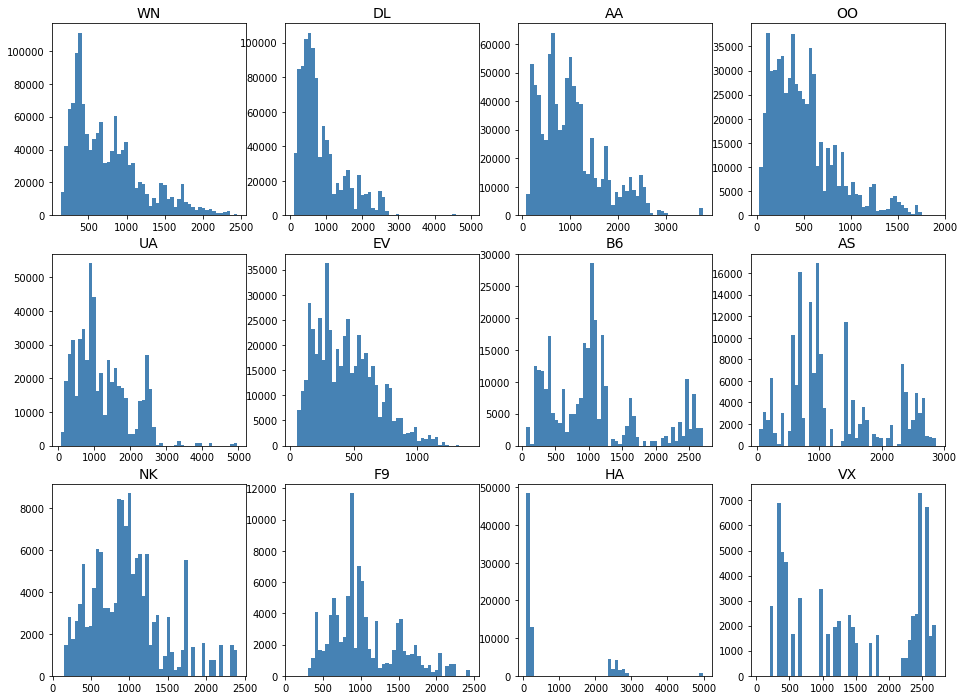

In [ ]:
fig = plt.figure(figsize=(16,12))
i=1
for carrier in carrier_list:
    ax = fig.add_subplot(3,4,i)
    ax.hist(dico_carrier_df[carrier].DISTANCE,bins=50, color='steelblue', edgecolor='none')
    ax.set_title(carrier,fontsize=14)
    i = i+1

##### After standardization

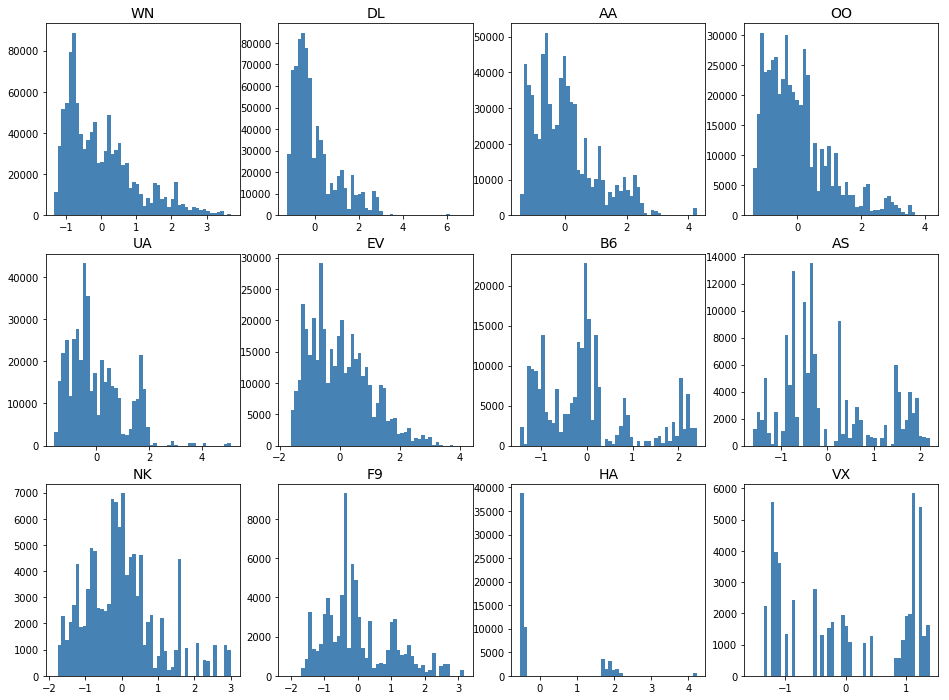

In [ ]:
fig = plt.figure(figsize=(16,12))
i=1
for carrier in carrier_list:
    ax = fig.add_subplot(3,4,i)
    ax.hist(train_test_sets[carrier]["X_train"].toarray()[:,-1],bins=50, color='steelblue', edgecolor='none')
    ax.set_title(carrier,fontsize=14)
    i = i+1

### Regression Models for different models

In [ ]:
baseLR_carriers = {}

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import RidgeCV, LassoCV

In [ ]:
# we'll test on different alpha's
n_alphas = 10
alphas = np.logspace(-5, 5, n_alphas)
#alphas = 10.0**-np.arange(1,7)

In [ ]:
for company in carrier_list:
    # creation of sub-dictionnary for current carrier
    baseLR_carriers[company] = {}
    
    # X_train and y_train for corresponding carrier
    X_train = train_test_sets[company]["X_train"]   #.toarray()   # conversion to dense array back
    y_train = train_test_sets[company]["y_train"] 
     
    X_test = train_test_sets[company]["X_test"]     #.toarray()    # conversion to dense array back
    y_test = train_test_sets[company]["y_test"]
    
    print(f"Data loaded for {company}")
    
    # BASE LINEAR REGRESSION MODEL
    lr = linear_model.LinearRegression()
    # training this model with training data
    lr.fit(X_train, y_train)
    
    print(f"Base model computed for {company}")
    
    # RMSE for base regression model
    baseLR_carriers[company]["RMSE_base"] = np.sqrt(metrics.mean_squared_error(y_test,lr.predict(X_test)))
    
    print(f"Base RMSE computed for {company}")

Data loaded for WN
Base model computed for WN
Base RMSE computed for WN
Data loaded for DL
Base model computed for DL
Base RMSE computed for DL
Data loaded for AA
Base model computed for AA
Base RMSE computed for AA
Data loaded for OO
Base model computed for OO
Base RMSE computed for OO
Data loaded for UA
Base model computed for UA
Base RMSE computed for UA
Data loaded for EV
Base model computed for EV
Base RMSE computed for EV
Data loaded for B6
Base model computed for B6
Base RMSE computed for B6
Data loaded for AS
Base model computed for AS
Base RMSE computed for AS
Data loaded for NK
Base model computed for NK
Base RMSE computed for NK
Data loaded for F9
Base model computed for F9
Base RMSE computed for F9
Data loaded for HA
Base model computed for HA
Base RMSE computed for HA
Data loaded for VX
Base model computed for VX
Base RMSE computed for VX


In [ ]:
for carrier in carrier_list:
    print(carrier, baseLR_carriers[carrier]["RMSE_base"])

WN 112.79166422766387
DL 78.50510263383381
AA 117.50799938775985
OO 125.60913161884078
UA 107.0015023783791
EV 159.87545863463907
B6 121.34137437123313
AS 75.89182643925005
NK 144.8904509498869
F9 118.58624128816383
HA 46.254354072382334
VX 108.55563741551266


## VX carrier

In [ ]:
X_train = train_test_sets["VX"]["X_train"]   #.toarray()   # conversion to dense array back
y_train = train_test_sets["VX"]["y_train"] 
     
X_test = train_test_sets["VX"]["X_test"]     #.toarray()    # conversion to dense array back
y_test = train_test_sets["VX"]["y_test"]

### Regularization Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs_VX = []
errors_VX = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_VX.append(ridge.coef_)
    errors_VX.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

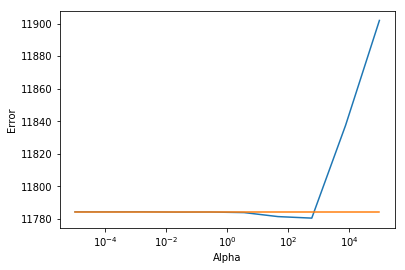

In [ ]:
ax = plt.gca()
ax.plot(alphas, errors_VX, [10**(-5),10**(5)], [baseLR_carriers["VX"]["RMSE_base"]**2, baseLR_carriers["VX"]["RMSE_base"]**2])
ax.set_xscale('log')
ax.get_yaxis().get_major_formatter().set_useOffset(False) # to avoid scientific scal on y axis
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.show();


In [ ]:
# Find the alpha associated to the lowest error
print(min(errors_VX))
print(np.argmin(errors_VX))
print(alphas[np.argmin(errors_VX)])

11780.5347481632
7
599.4842503189421


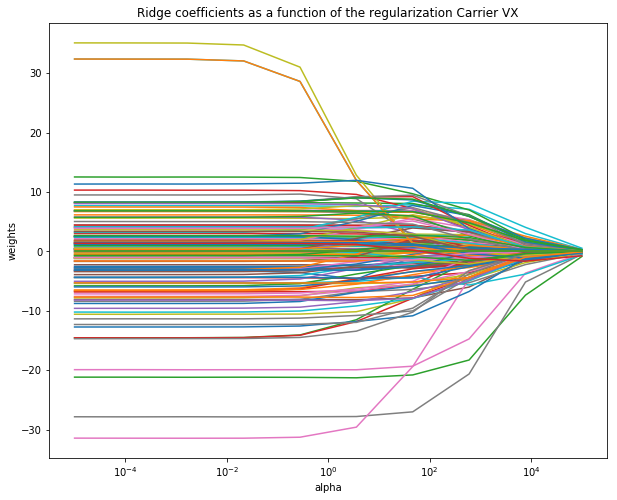

In [ ]:
# regularisation paths
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,coefs_VX)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier VX')
plt.axis('tight')
plt.show()

#### Cross-validation

In [ ]:
from sklearn.linear_model import RidgeCV 
VX_ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
VX_ridgecv.fit(X_train, y_train)
VX_RMSE_Ridge = np.sqrt(metrics.mean_squared_error(y_test,ridgecv.predict(X_test)))
VX_Ridge_alpha = ridgecv.alpha_
print(VX_RMSE_Ridge)

### LASSO 

In [ ]:
# LASSO
lasso = linear_model.Lasso(fit_intercept=False)

Lcoefs_VX = []
Lerrors_VX = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    Lcoefs_VX.append(lasso.coef_)
    Lerrors_VX.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

In [ ]:
# on observe le comportement de l'erreur
plt.figure(figsize = [8,5])
ax = plt.gca()
ax.plot(alphas, Lerrors_VX, [10**-5,10**5], [baseLR_carriers["VX"]["RMSE_base"]**2, baseLR_carriers["VX"]["RMSE_base"]**2])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [ ]:
Lerrors_VX[np.argmin(Lerrors_VX)]

In [ ]:
alphas[np.argmin(Lerrors_VX)]

In [ ]:
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,Lcoefs_VX)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier = VX')
plt.axis('tight')
plt.show()

#### Cross-validation

In [ ]:
from sklearn.linear_model import LassoCV
VX_lassocv = LassoCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
VX_lassocv.fit(X_train, y_train)
VX_LASSO_alpha = VX_lassocv.alpha_ 
VX_RMSE_Lasso = np.sqrt(metrics.mean_squared_error(y_test,lassocv.predict(X_test)))
print(VX_RMSE_Lasso)

In [ ]:
for company in carrier_test:
    # creation of sub-dictionnary for current carrier
    regression_carriers[company] = {}
    
    # X_train and y_train for corresponding carrier
    X_train = train_test_sets[company]["X_train"]   #.toarray()   # conversion to dense array back
    y_train = train_test_sets[company]["y_train"] 
     
    X_test = train_test_sets[company]["X_test"]     #.toarray()    # conversion to dense array back
    y_test = train_test_sets[company]["y_test"]
    
    print(f"Data loaded for {company}")
    
    # BASE LINEAR REGRESSION MODEL
    lr = linear_model.LinearRegression()
    # training this model with training data
    lr.fit(X_train, y_train)
    
    print(f"Base model computed for {company}")
    
    # RMSE for base regression model
    regression_carriers[company]["RMSE_base"] = np.sqrt(metrics.mean_squared_error(y_test,lr.predict(X_test)))
    
    print(f"Base RMSE computed for {company}")
    
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # RIDGE REGRESSION
    ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
    ridgecv.fit(X_train, y_train)
    alpha = ridgecv.alpha_ 
    regression_carriers[company]["RMSE_Ridge"] = np.sqrt(metrics.mean_squared_error(y_test,ridgecv.predict(X_test)))
    regression_carriers[company]["alpha_Ridge"] = alpha
    
    print(f"Ridge model computed for {company}")
          
    # ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    # LASSO REGRESSION
    lassocv = LassoCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
    lassocv.fit(X_train, y_train)
    alpha = lassocv.alpha_ 
    regression_carriers[company]["RMSE_Lasso"] = np.sqrt(metrics.mean_squared_error(y_test,lassocv.predict(X_test)))
    regression_carriers[company]["alpha_Lasso"] = alpha
    
    print(f"Lasso model computed for {company}")

### Carrier: HA  => Scaling, split in Training and Test set

In [38]:
df_HA = dico_carrier_df["HA"]

In [39]:
# X : we don't keep UNIQUE_CARRIER nor ARR_DELAY 
X_features_dense = df_HA.iloc[:,:-2]

In [40]:
X_features = sparse_df(X_features_dense)
y_features = df_HA['ARR_DELAY'].values

#### Creating Training and Test set

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2)

In [42]:
# Need to scale the NUMERICAL data on the TRAINING set ONLY
X_train_numerical = X_train[:, -1].toarray()  # before scaling, we need to convert to a dense matrix
X_test_numerical = X_test[:, -1].toarray()

#### Standadizing the data

> - Scale the numerical data, on the **TRAINING SET ONLY**
> - Reconvert afterwards to numerical data to sparse matrix
> - Scaler is only fit to the training data

In [43]:

from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler() # create scaler object
scaler.fit(X_train_numerical) # fit with the training data ONLY
X_train_numerical = sparse.csr_matrix(scaler.transform(X_train_numerical)) # Transform the data and convert to sparse
X_test_numerical = sparse.csr_matrix(scaler.transform(X_test_numerical))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [44]:
# replacing the numerical column (corresponding to DISTANCE) with the scaled values
X_train[:, -1] = X_train_numerical
X_test[:, -1] = X_test_numerical

<a id='model_training_WN'></a>
## Model training - Carrier : HA

> First step is to realize a classical linear regression, in order to compute a baseline error that we'll try to improve through regularisation technics

In [45]:
# classical linear regression to have a comparaison
from sklearn import linear_model
# creation of linear regression model
lr = linear_model.LinearRegression()
# training this model with training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Baseline error

In [46]:
# average of the quadratic errors on the test data
import numpy as np
# Computing the norm 2 error on the test data as baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
print(baseline_error)

2440.0521063577366


### Ridge regression

In [47]:
# we'll test on different alpha's
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)

from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs_HA = []
errors_HA = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_HA.append(ridge.coef_)
    errors_HA.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

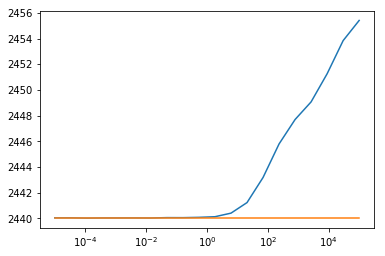

In [48]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, errors_HA, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.show();

In [49]:
# Find the alpha associated to the lowest error
print(min(errors_HA))
print(np.argmin(errors_HA))
print(alphas[np.argmin(errors_HA)])

2440.029490118554
2
0.00011288378916846884


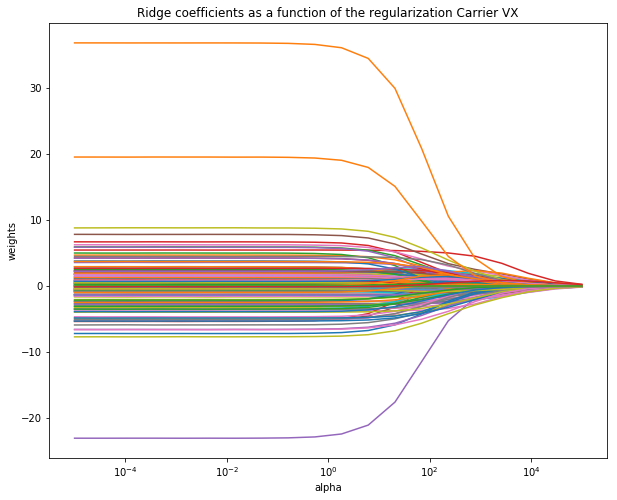

In [50]:
# regularisation paths
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,coefs_HA)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier HA')
plt.axis('tight')
plt.show()

### LASSO

In [51]:
# LASSO
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

Lcoefs_HA = []
Lerrors_HA = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    Lcoefs_HA.append(lasso.coef_)
    Lerrors_HA.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

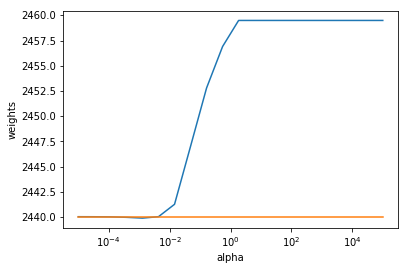

In [52]:
# on observe le comportement de l'erreur
ax = plt.gca()
ax.plot(alphas, Lerrors_HA, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [53]:
Lerrors_HA[np.argmin(Lerrors_HA)]

2439.910281713993

In [54]:
alphas[np.argmin(Lerrors_HA)]

0.0012742749857031334

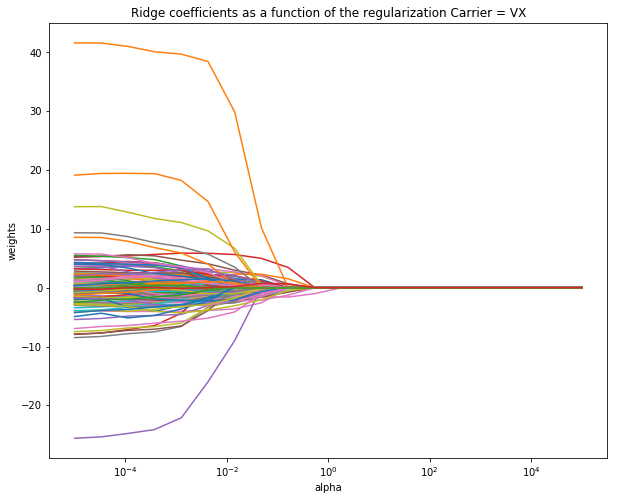

In [55]:
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,Lcoefs_HA)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier = HA')
plt.axis('tight')
plt.show()

### Carrier: F9  => Scaling, split in Training and Test set

In [56]:
df_F9 = dico_carrier_df["F9"]

In [57]:
# X : we don't keep UNIQUE_CARRIER nor ARR_DELAY 
X_features_dense = df_F9.iloc[:,:-2]

In [58]:
X_features = sparse_df(X_features_dense)
y_features = df_F9['ARR_DELAY'].values

#### Creating Training and Test set

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2)

In [60]:
# Need to scale the NUMERICAL data on the TRAINING set ONLY
X_train_numerical = X_train[:, -1].toarray()  # before scaling, we need to convert to a dense matrix
X_test_numerical = X_test[:, -1].toarray()

#### Standadizing the data

> - Scale the numerical data, on the **TRAINING SET ONLY**
> - Reconvert afterwards to numerical data to sparse matrix
> - Scaler is only fit to the training data

In [61]:

from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler() # create scaler object
scaler.fit(X_train_numerical) # fit with the training data ONLY
X_train_numerical = sparse.csr_matrix(scaler.transform(X_train_numerical)) # Transform the data and convert to sparse
X_test_numerical = sparse.csr_matrix(scaler.transform(X_test_numerical))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [62]:
# replacing the numerical column (corresponding to DISTANCE) with the scaled values
X_train[:, -1] = X_train_numerical
X_test[:, -1] = X_test_numerical

<a id='model_training_WN'></a>
## Model training - Carrier : F9

> First step is to realize a classical linear regression, in order to compute a baseline error that we'll try to improve through regularisation technics

In [63]:
# classical linear regression to have a comparaison
from sklearn import linear_model
# creation of linear regression model
lr = linear_model.LinearRegression()
# training this model with training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Baseline error

In [64]:
# average of the quadratic errors on the test data
import numpy as np
# Computing the norm 2 error on the test data as baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
print(baseline_error)

14840.025759470602


### Ridge regression

In [65]:
# we'll test on different alpha's
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)

from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs_F9 = []
errors_F9 = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_F9.append(ridge.coef_)
    errors_F9.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

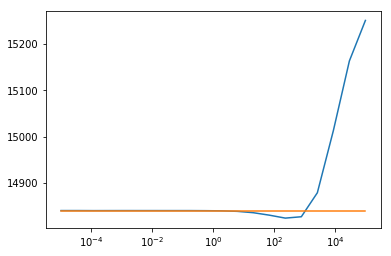

In [66]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, errors_F9, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.show();

In [67]:
# Find the alpha associated to the lowest error
print(min(errors_F9))
print(np.argmin(errors_F9))
print(alphas[np.argmin(errors_F9)])

14823.72354952974
14
233.57214690901213


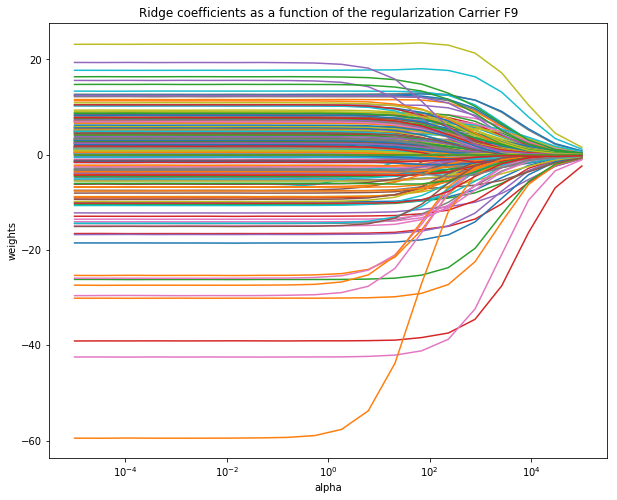

In [68]:
# regularisation paths
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,coefs_F9)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier F9')
plt.axis('tight')
plt.show()

### LASSO

In [69]:
# LASSO
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

Lcoefs_F9 = []
Lerrors_F9 = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    Lcoefs_F9.append(lasso.coef_)
    Lerrors_F9.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

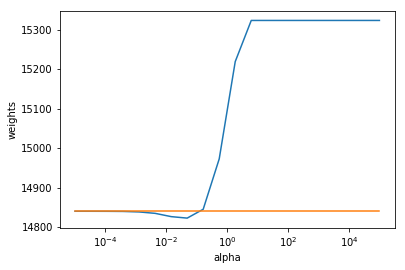

In [70]:
# on observe le comportement de l'erreur
ax = plt.gca()
ax.plot(alphas, Lerrors_F9, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [71]:
Lerrors_F9[np.argmin(Lerrors_F9)]

14822.622460346416

In [72]:
alphas[np.argmin(Lerrors_F9)]

0.04832930238571752

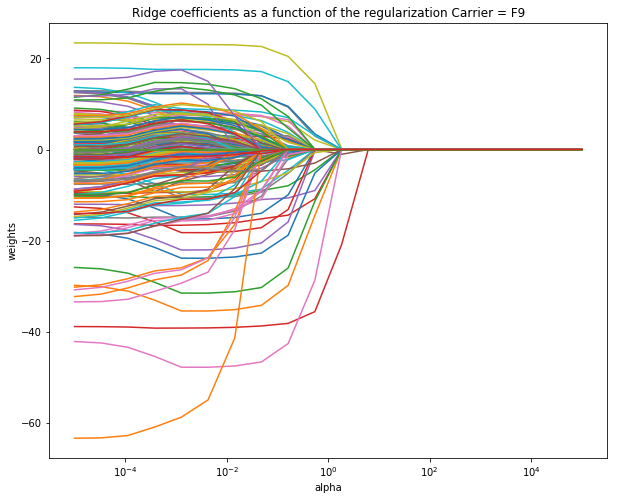

In [74]:
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,Lcoefs_F9)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier = F9')
plt.axis('tight')
plt.show()

### Carrier: NK => Scaling, split in Training and Test set

In [75]:
df_NK = dico_carrier_df["NK"]

In [76]:
# X : we don't keep UNIQUE_CARRIER nor ARR_DELAY 
X_features_dense = df_NK.iloc[:,:-2]

In [77]:
X_features = sparse_df(X_features_dense)
y_features = df_NK['ARR_DELAY'].values

#### Creating Training and Test set

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2)

In [79]:
# Need to scale the NUMERICAL data on the TRAINING set ONLY
X_train_numerical = X_train[:, -1].toarray()  # before scaling, we need to convert to a dense matrix
X_test_numerical = X_test[:, -1].toarray()

#### Standadizing the data

> - Scale the numerical data, on the **TRAINING SET ONLY**
> - Reconvert afterwards to numerical data to sparse matrix
> - Scaler is only fit to the training data

In [80]:

from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler() # create scaler object
scaler.fit(X_train_numerical) # fit with the training data ONLY
X_train_numerical = sparse.csr_matrix(scaler.transform(X_train_numerical)) # Transform the data and convert to sparse
X_test_numerical = sparse.csr_matrix(scaler.transform(X_test_numerical))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [81]:
# replacing the numerical column (corresponding to DISTANCE) with the scaled values
X_train[:, -1] = X_train_numerical
X_test[:, -1] = X_test_numerical

<a id='model_training_WN'></a>
## Model training - Carrier : NK

> First step is to realize a classical linear regression, in order to compute a baseline error that we'll try to improve through regularisation technics

In [82]:
# classical linear regression to have a comparaison
from sklearn import linear_model
# creation of linear regression model
lr = linear_model.LinearRegression()
# training this model with training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Baseline error

In [83]:
# average of the quadratic errors on the test data
import numpy as np
# Computing the norm 2 error on the test data as baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
print(baseline_error)

21497.146258537785


### Ridge regression

In [84]:
# we'll test on different alpha's
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)

from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs_NK = []
errors_NK = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_NK.append(ridge.coef_)
    errors_NK.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

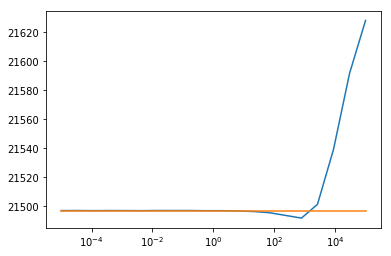

In [85]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, errors_NK, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.show();

In [86]:
# Find the alpha associated to the lowest error
print(min(errors_NK))
print(np.argmin(errors_NK))
print(alphas[np.argmin(errors_NK)])

21491.935454209564
15
784.7599703514607


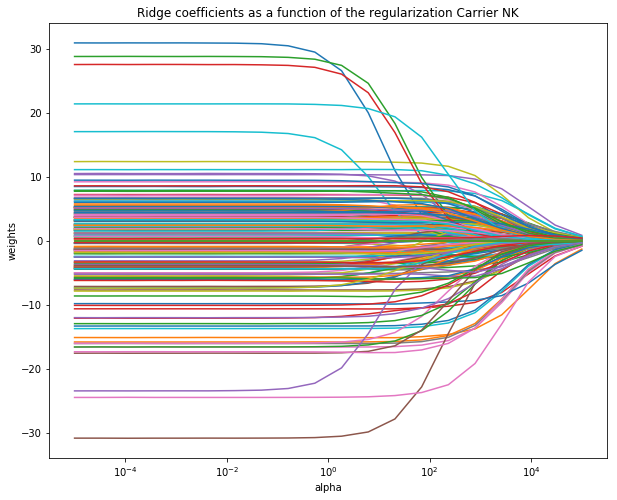

In [87]:
# regularisation paths
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,coefs_NK)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier NK')
plt.axis('tight')
plt.show()

### LASSO

In [88]:
# LASSO
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

Lcoefs_NK = []
Lerrors_NK = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    Lcoefs_NK.append(lasso.coef_)
    Lerrors_NK.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

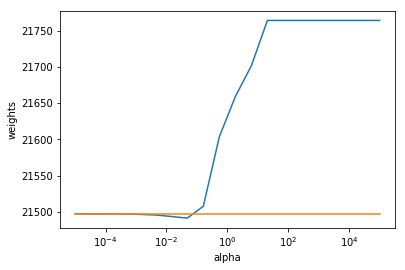

In [89]:
# on observe le comportement de l'erreur
ax = plt.gca()
ax.plot(alphas, Lerrors_NK, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [90]:
Lerrors_NK[np.argmin(Lerrors_NK)]

21491.16538439855

In [91]:
alphas[np.argmin(Lerrors_NK)]

0.04832930238571752

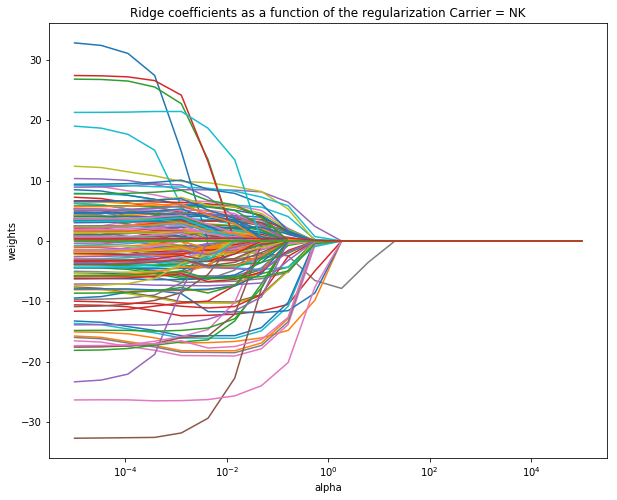

In [92]:
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,Lcoefs_NK)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier = NK')
plt.axis('tight')
plt.show()

### Carrier: AS => Scaling, split in Training and Test set

In [93]:
df_AS = dico_carrier_df["AS"]

In [94]:
# X : we don't keep UNIQUE_CARRIER nor ARR_DELAY 
X_features_dense = df_AS.iloc[:,:-2]

In [95]:
X_features = sparse_df(X_features_dense)
y_features = df_AS['ARR_DELAY'].values

#### Creating Training and Test set

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2)

In [97]:
# Need to scale the NUMERICAL data on the TRAINING set ONLY
X_train_numerical = X_train[:, -1].toarray()  # before scaling, we need to convert to a dense matrix
X_test_numerical = X_test[:, -1].toarray()

#### Standadizing the data

> - Scale the numerical data, on the **TRAINING SET ONLY**
> - Reconvert afterwards to numerical data to sparse matrix
> - Scaler is only fit to the training data

In [98]:

from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler() # create scaler object
scaler.fit(X_train_numerical) # fit with the training data ONLY
X_train_numerical = sparse.csr_matrix(scaler.transform(X_train_numerical)) # Transform the data and convert to sparse
X_test_numerical = sparse.csr_matrix(scaler.transform(X_test_numerical))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [99]:
# replacing the numerical column (corresponding to DISTANCE) with the scaled values
X_train[:, -1] = X_train_numerical
X_test[:, -1] = X_test_numerical

<a id='model_training_WN'></a>
## Model training - Carrier : AS

> First step is to realize a classical linear regression, in order to compute a baseline error that we'll try to improve through regularisation technics

In [100]:
# classical linear regression to have a comparaison
from sklearn import linear_model
# creation of linear regression model
lr = linear_model.LinearRegression()
# training this model with training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Baseline error

In [101]:
# average of the quadratic errors on the test data
import numpy as np
# Computing the norm 2 error on the test data as baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
print(baseline_error)

6161.310048618452


### Ridge regression

In [102]:
# we'll test on different alpha's
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)

from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs_AS = []
errors_AS = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_AS.append(ridge.coef_)
    errors_AS.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

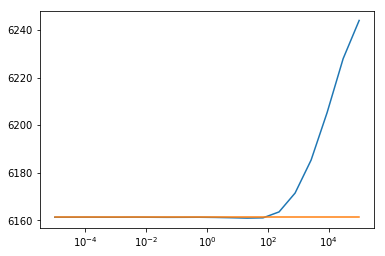

In [103]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, errors_AS, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.show();

In [104]:
# Find the alpha associated to the lowest error
print(min(errors_AS))
print(np.argmin(errors_AS))
print(alphas[np.argmin(errors_AS)])

6160.945520001125
12
20.6913808111479


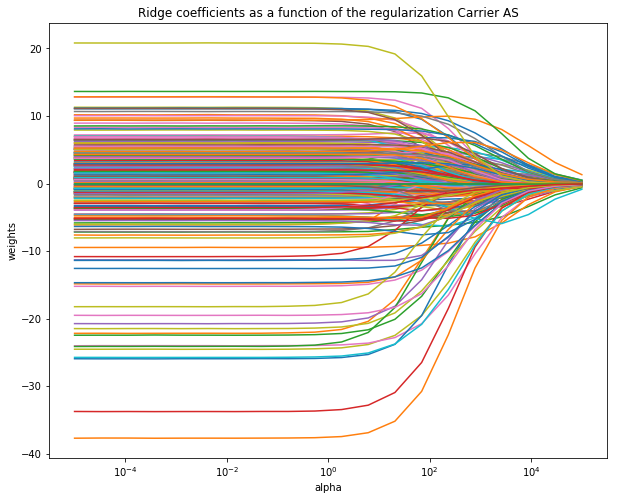

In [105]:
# regularisation paths
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,coefs_AS)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier AS')
plt.axis('tight')
plt.show()

### LASSO

In [106]:
# LASSO
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

Lcoefs_AS = []
Lerrors_AS = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    Lcoefs_AS.append(lasso.coef_)
    Lerrors_AS.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

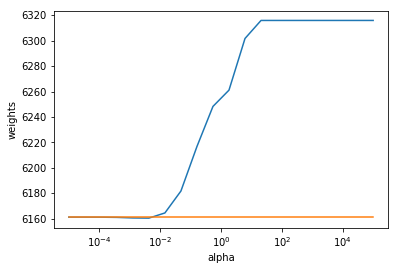

In [107]:
# on observe le comportement de l'erreur
ax = plt.gca()
ax.plot(alphas, Lerrors_AS, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [108]:
Lerrors_AS[np.argmin(Lerrors_AS)]

6160.525006038393

In [109]:
alphas[np.argmin(Lerrors_AS)]

0.004281332398719391

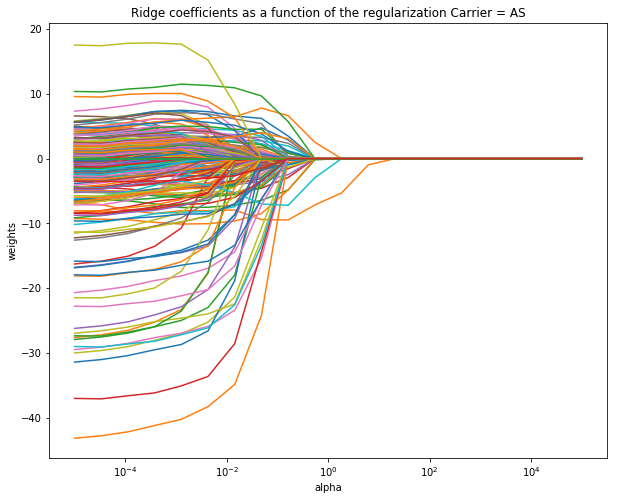

In [110]:
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,Lcoefs_AS)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier = AS')
plt.axis('tight')
plt.show()

### Carrier: B6 => Scaling, split in Training and Test set

In [111]:
df_B6 = dico_carrier_df["B6"]

In [112]:
# X : we don't keep UNIQUE_CARRIER nor ARR_DELAY 
X_features_dense = df_B6.iloc[:,:-2]

In [113]:
X_features = sparse_df(X_features_dense)
y_features = df_B6['ARR_DELAY'].values

#### Creating Training and Test set

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2)

In [115]:
# Need to scale the NUMERICAL data on the TRAINING set ONLY
X_train_numerical = X_train[:, -1].toarray()  # before scaling, we need to convert to a dense matrix
X_test_numerical = X_test[:, -1].toarray()

#### Standadizing the data

> - Scale the numerical data, on the **TRAINING SET ONLY**
> - Reconvert afterwards to numerical data to sparse matrix
> - Scaler is only fit to the training data

In [116]:

from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler() # create scaler object
scaler.fit(X_train_numerical) # fit with the training data ONLY
X_train_numerical = sparse.csr_matrix(scaler.transform(X_train_numerical)) # Transform the data and convert to sparse
X_test_numerical = sparse.csr_matrix(scaler.transform(X_test_numerical))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [117]:
# replacing the numerical column (corresponding to DISTANCE) with the scaled values
X_train[:, -1] = X_train_numerical
X_test[:, -1] = X_test_numerical

<a id='model_training_WN'></a>
## Model training - Carrier : B6

> First step is to realize a classical linear regression, in order to compute a baseline error that we'll try to improve through regularisation technics

In [118]:
# classical linear regression to have a comparaison
from sklearn import linear_model
# creation of linear regression model
lr = linear_model.LinearRegression()
# training this model with training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Baseline error

In [119]:
# average of the quadratic errors on the test data
import numpy as np
# Computing the norm 2 error on the test data as baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
print(baseline_error)

14926.252851217534


### Ridge regression

In [120]:
# we'll test on different alpha's
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)

from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs_B6 = []
errors_B6 = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_B6.append(ridge.coef_)
    errors_B6.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

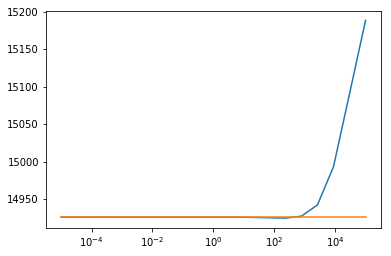

In [121]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, errors_B6, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.show();

In [122]:
# Find the alpha associated to the lowest error
print(min(errors_B6))
print(np.argmin(errors_B6))
print(alphas[np.argmin(errors_B6)])

14924.951712879752
14
233.57214690901213


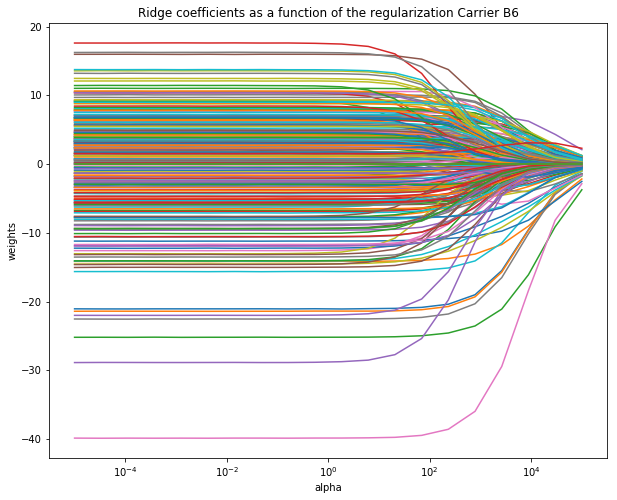

In [123]:
# regularisation paths
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,coefs_B6)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier B6')
plt.axis('tight')
plt.show()

### LASSO

In [124]:
# LASSO
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

Lcoefs_B6 = []
Lerrors_B6 = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    Lcoefs_B6.append(lasso.coef_)
    Lerrors_B6.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

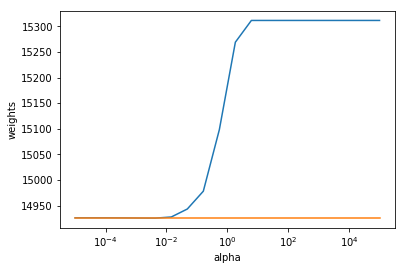

In [125]:
# on observe le comportement de l'erreur
ax = plt.gca()
ax.plot(alphas, Lerrors_B6, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [126]:
Lerrors_B6[np.argmin(Lerrors_B6)]

14925.6263127642

In [127]:
alphas[np.argmin(Lerrors_B6)]

0.004281332398719391

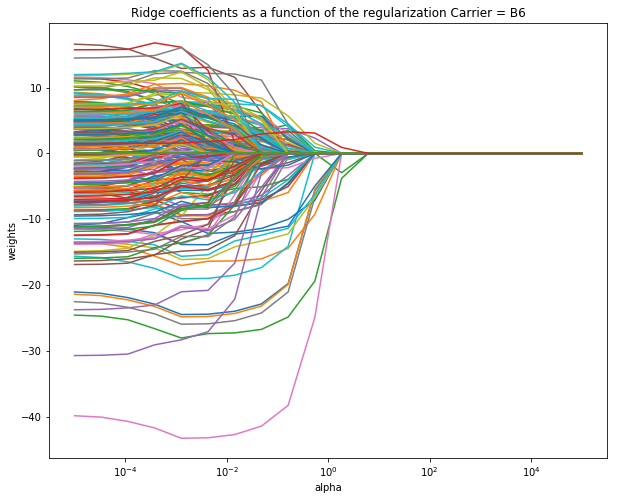

In [128]:
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,Lcoefs_B6)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier = B6')
plt.axis('tight')
plt.show()

### Carrier: EV => Scaling, split in Training and Test set

In [129]:
df_EV = dico_carrier_df["EV"]

In [130]:
# X : we don't keep UNIQUE_CARRIER nor ARR_DELAY 
X_features_dense = df_EV.iloc[:,:-2]

In [131]:
X_features = sparse_df(X_features_dense)
y_features = df_EV['ARR_DELAY'].values

#### Creating Training and Test set

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2)

In [133]:
# Need to scale the NUMERICAL data on the TRAINING set ONLY
X_train_numerical = X_train[:, -1].toarray()  # before scaling, we need to convert to a dense matrix
X_test_numerical = X_test[:, -1].toarray()

#### Standadizing the data

> - Scale the numerical data, on the **TRAINING SET ONLY**
> - Reconvert afterwards to numerical data to sparse matrix
> - Scaler is only fit to the training data

In [134]:

from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler() # create scaler object
scaler.fit(X_train_numerical) # fit with the training data ONLY
X_train_numerical = sparse.csr_matrix(scaler.transform(X_train_numerical)) # Transform the data and convert to sparse
X_test_numerical = sparse.csr_matrix(scaler.transform(X_test_numerical))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [135]:
# replacing the numerical column (corresponding to DISTANCE) with the scaled values
X_train[:, -1] = X_train_numerical
X_test[:, -1] = X_test_numerical

<a id='model_training_WN'></a>
## Model training - Carrier : EV

> First step is to realize a classical linear regression, in order to compute a baseline error that we'll try to improve through regularisation technics

In [136]:
# classical linear regression to have a comparaison
from sklearn import linear_model
# creation of linear regression model
lr = linear_model.LinearRegression()
# training this model with training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Baseline error

In [137]:
# average of the quadratic errors on the test data
import numpy as np
# Computing the norm 2 error on the test data as baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
print(baseline_error)

26021.956245631758


### Ridge regression

In [138]:
# we'll test on different alpha's
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)

from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs_EV = []
errors_EV = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_EV.append(ridge.coef_)
    errors_EV.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

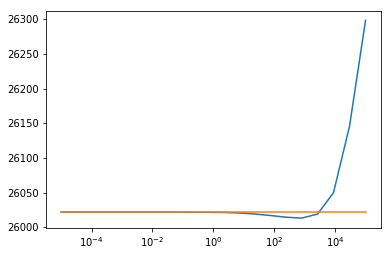

In [139]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, errors_EV, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.show();

In [140]:
# Find the alpha associated to the lowest error
print(min(errors_EV))
print(np.argmin(errors_EV))
print(alphas[np.argmin(errors_EV)])

26013.32338861918
15
784.7599703514607


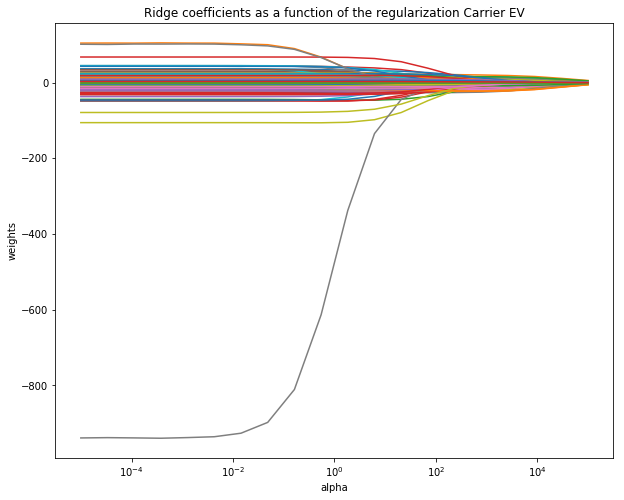

In [141]:
# regularisation paths
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,coefs_EV)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier EV')
plt.axis('tight')
plt.show()

### LASSO

In [142]:
# LASSO
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

Lcoefs_EV = []
Lerrors_EV = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    Lcoefs_EV.append(lasso.coef_)
    Lerrors_EV.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

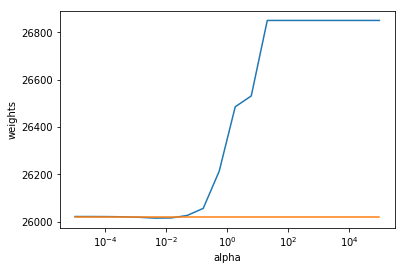

In [143]:
# on observe le comportement de l'erreur
ax = plt.gca()
ax.plot(alphas, Lerrors_EV, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [145]:
Lerrors_EV[np.argmin(Lerrors_EV)]

26015.202509170293

In [146]:
alphas[np.argmin(Lerrors_EV)]

0.004281332398719391

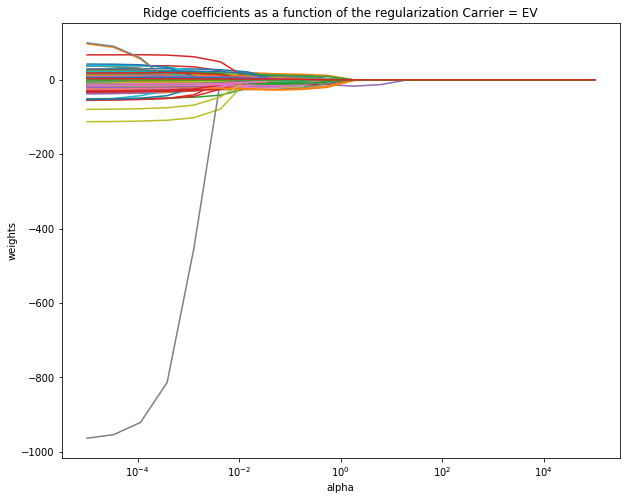

In [147]:
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,Lcoefs_EV)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier = EV')
plt.axis('tight')
plt.show()

### Carrier: UA => Scaling, split in Training and Test set

In [148]:
df_UA = dico_carrier_df["UA"]

In [149]:
# X : we don't keep UNIQUE_CARRIER nor ARR_DELAY 
X_features_dense = df_UA.iloc[:,:-2]

In [150]:
X_features = sparse_df(X_features_dense)
y_features = df_UA['ARR_DELAY'].values

#### Creating Training and Test set

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2)

In [152]:
# Need to scale the NUMERICAL data on the TRAINING set ONLY
X_train_numerical = X_train[:, -1].toarray()  # before scaling, we need to convert to a dense matrix
X_test_numerical = X_test[:, -1].toarray()

#### Standadizing the data

> - Scale the numerical data, on the **TRAINING SET ONLY**
> - Reconvert afterwards to numerical data to sparse matrix
> - Scaler is only fit to the training data

In [153]:

from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler() # create scaler object
scaler.fit(X_train_numerical) # fit with the training data ONLY
X_train_numerical = sparse.csr_matrix(scaler.transform(X_train_numerical)) # Transform the data and convert to sparse
X_test_numerical = sparse.csr_matrix(scaler.transform(X_test_numerical))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [154]:
# replacing the numerical column (corresponding to DISTANCE) with the scaled values
X_train[:, -1] = X_train_numerical
X_test[:, -1] = X_test_numerical

<a id='model_training_WN'></a>
## Model training - Carrier : UA

> First step is to realize a classical linear regression, in order to compute a baseline error that we'll try to improve through regularisation technics

In [155]:
# classical linear regression to have a comparaison
from sklearn import linear_model
# creation of linear regression model
lr = linear_model.LinearRegression()
# training this model with training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Baseline error

In [156]:
# average of the quadratic errors on the test data
import numpy as np
# Computing the norm 2 error on the test data as baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
print(baseline_error)

11956.786076604705


### Ridge regression

In [157]:
# we'll test on different alpha's
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)

from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs_UA = []
errors_UA = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_UA.append(ridge.coef_)
    errors_UA.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

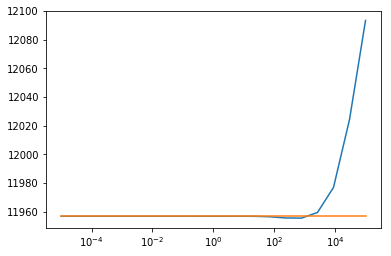

In [158]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, errors_UA, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.show();

In [159]:
# Find the alpha associated to the lowest error
print(min(errors_UA))
print(np.argmin(errors_UA))
print(alphas[np.argmin(errors_UA)])

11955.48377788334
15
784.7599703514607


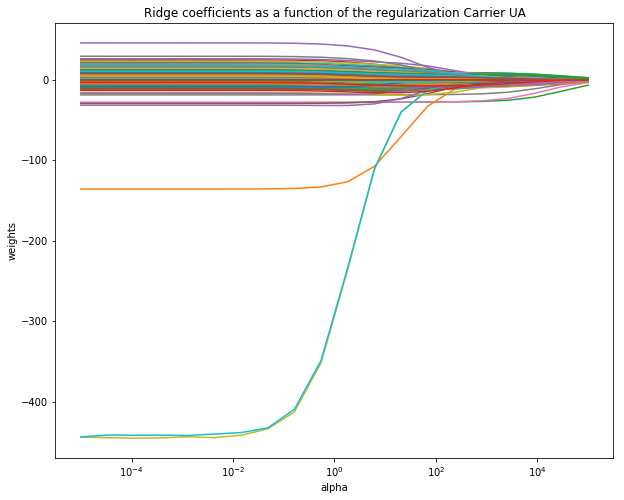

In [160]:
# regularisation paths
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,coefs_UA)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier UA')
plt.axis('tight')
plt.show()

### LASSO

In [161]:
# LASSO
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

Lcoefs_UA = []
Lerrors_UA = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    Lcoefs_UA.append(lasso.coef_)
    Lerrors_UA.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

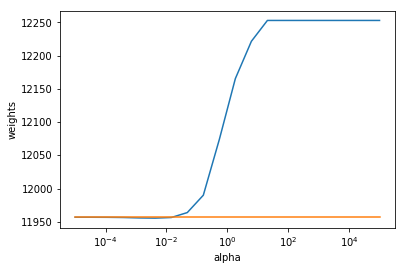

In [162]:
# on observe le comportement de l'erreur
ax = plt.gca()
ax.plot(alphas, Lerrors_UA, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [163]:
Lerrors_UA[np.argmin(Lerrors_UA)]

11955.443435455301

In [164]:
alphas[np.argmin(Lerrors_UA)]

0.004281332398719391

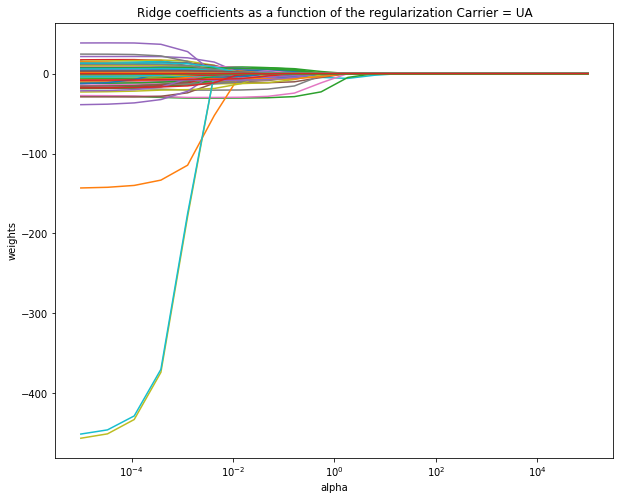

In [165]:
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,Lcoefs_UA)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier = UA')
plt.axis('tight')
plt.show()

### Carrier: OO => Scaling, split in Training and Test set

In [166]:
df_OO = dico_carrier_df["OO"]

In [167]:
# X : we don't keep UNIQUE_CARRIER nor ARR_DELAY 
X_features_dense = df_OO.iloc[:,:-2]

In [168]:
X_features = sparse_df(X_features_dense)
y_features = df_OO['ARR_DELAY'].values

#### Creating Training and Test set

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2)

In [170]:
# Need to scale the NUMERICAL data on the TRAINING set ONLY
X_train_numerical = X_train[:, -1].toarray()  # before scaling, we need to convert to a dense matrix
X_test_numerical = X_test[:, -1].toarray()

#### Standadizing the data

> - Scale the numerical data, on the **TRAINING SET ONLY**
> - Reconvert afterwards to numerical data to sparse matrix
> - Scaler is only fit to the training data

In [171]:

from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler() # create scaler object
scaler.fit(X_train_numerical) # fit with the training data ONLY
X_train_numerical = sparse.csr_matrix(scaler.transform(X_train_numerical)) # Transform the data and convert to sparse
X_test_numerical = sparse.csr_matrix(scaler.transform(X_test_numerical))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [172]:
# replacing the numerical column (corresponding to DISTANCE) with the scaled values
X_train[:, -1] = X_train_numerical
X_test[:, -1] = X_test_numerical

<a id='model_training_WN'></a>
## Model training - Carrier : OO

> First step is to realize a classical linear regression, in order to compute a baseline error that we'll try to improve through regularisation technics

In [173]:
# classical linear regression to have a comparaison
from sklearn import linear_model
# creation of linear regression model
lr = linear_model.LinearRegression()
# training this model with training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Baseline error

In [174]:
# average of the quadratic errors on the test data
import numpy as np
# Computing the norm 2 error on the test data as baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
print(baseline_error)

15191.725138687527


### Ridge regression

In [175]:
# we'll test on different alpha's
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)

from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs_OO = []
errors_OO = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_OO.append(ridge.coef_)
    errors_OO.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

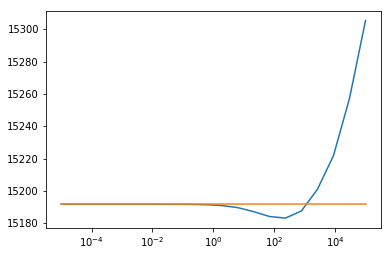

In [176]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, errors_OO, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.show();

In [177]:
# Find the alpha associated to the lowest error
print(min(errors_OO))
print(np.argmin(errors_OO))
print(alphas[np.argmin(errors_OO)])

15183.183780958563
14
233.57214690901213


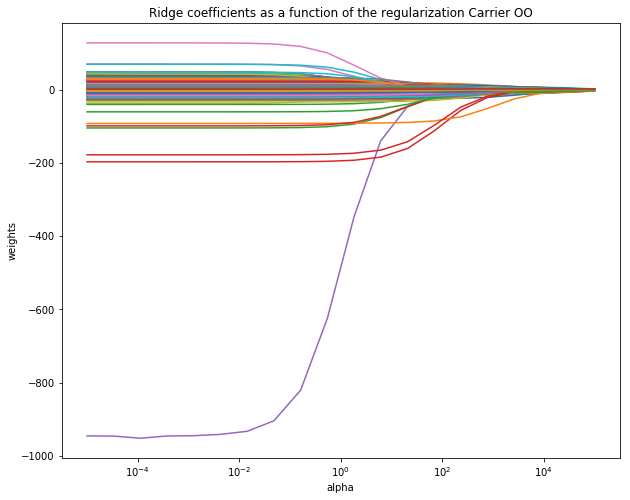

In [178]:
# regularisation paths
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,coefs_OO)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier OO')
plt.axis('tight')
plt.show()

### LASSO

In [179]:
# LASSO
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

Lcoefs_OO = []
Lerrors_OO = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    Lcoefs_OO.append(lasso.coef_)
    Lerrors_OO.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

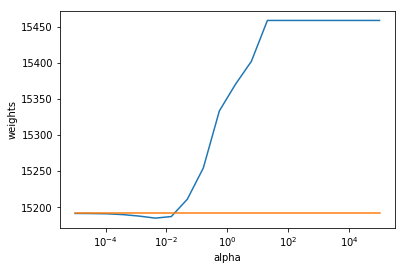

In [180]:
# on observe le comportement de l'erreur
ax = plt.gca()
ax.plot(alphas, Lerrors_OO, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [181]:
Lerrors_OO[np.argmin(Lerrors_OO)]

15185.187636967094

In [182]:
alphas[np.argmin(Lerrors_OO)]

0.004281332398719391

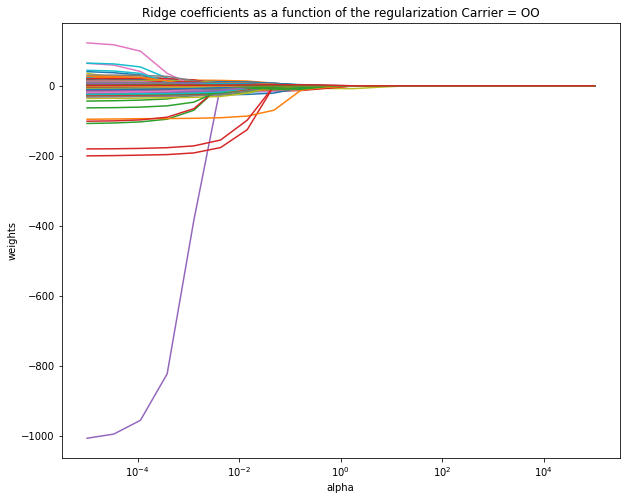

In [183]:
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,Lcoefs_OO)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier = OO')
plt.axis('tight')
plt.show()

In [ ]:
df_AA.head(1)

### Carrier: AA => Scaling, split in Training and Test set

In [184]:
df_AA = dico_carrier_df["AA"]

In [233]:
# X : we don't keep UNIQUE_CARRIER nor ARR_DELAY 
X_features_dense = df_AA.iloc[:,:-2]

In [234]:
X_features = sparse_df(X_features_dense)
y_features = df_AA['ARR_DELAY'].values

#### Creating Training and Test set

In [235]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2)

In [236]:
# Need to scale the NUMERICAL data on the TRAINING set ONLY
X_train_numerical = X_train[:, -1].toarray()  # before scaling, we need to convert to a dense matrix
X_test_numerical = X_test[:, -1].toarray()

#### Standadizing the data

> - Scale the numerical data, on the **TRAINING SET ONLY**
> - Reconvert afterwards to numerical data to sparse matrix
> - Scaler is only fit to the training data

In [237]:

from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler() # create scaler object
scaler.fit(X_train_numerical) # fit with the training data ONLY
X_train_numerical = sparse.csr_matrix(scaler.transform(X_train_numerical)) # Transform the data and convert to sparse
X_test_numerical = sparse.csr_matrix(scaler.transform(X_test_numerical))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [238]:
# replacing the numerical column (corresponding to DISTANCE) with the scaled values
X_train[:, -1] = X_train_numerical
X_test[:, -1] = X_test_numerical

<a id='model_training_WN'></a>
## Model training - Carrier : AA

> First step is to realize a classical linear regression, in order to compute a baseline error that we'll try to improve through regularisation technics

In [239]:
# classical linear regression to have a comparaison
from sklearn import linear_model
# creation of linear regression model
lr = linear_model.LinearRegression()
# training this model with training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Baseline error

In [240]:
# average of the quadratic errors on the test data
import numpy as np
# Computing the norm 2 error on the test data as baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
print(baseline_error)

14040.678376410258


### Ridge regression

In [241]:
# we'll test on different alpha's
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)

from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs_AA = []
errors_AA = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_AA.append(ridge.coef_)
    errors_AA.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

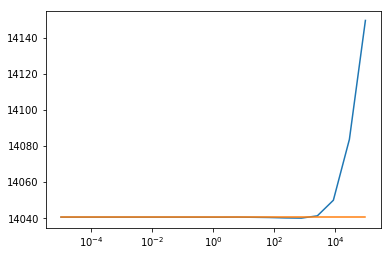

In [246]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, errors_AA, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.show();

In [247]:
# Find the alpha associated to the lowest error
print(min(errors_AA))
print(np.argmin(errors_AA))
print(alphas[np.argmin(errors_AA)])

14040.142179511333
15
784.7599703514607


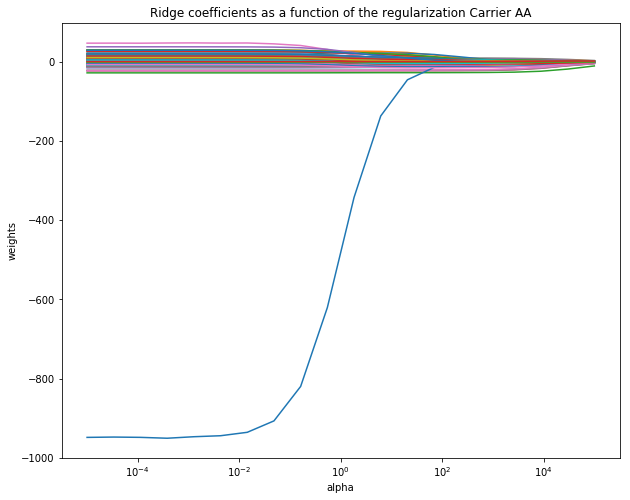

In [248]:
# regularisation paths
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,coefs_AA)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier AA')
plt.axis('tight')
plt.show()

### LASSO

In [249]:
# LASSO
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

Lcoefs_AA = []
Lerrors_AA = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    Lcoefs_AA.append(lasso.coef_)
    Lerrors_AA.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

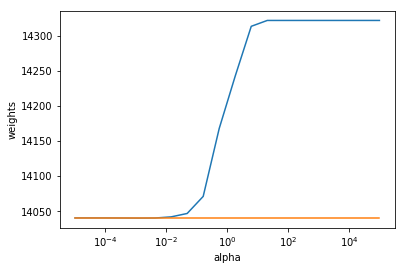

In [250]:
# on observe le comportement de l'erreur
ax = plt.gca()
ax.plot(alphas, Lerrors_AA, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [251]:
Lerrors_AA[np.argmin(Lerrors_AA)]

14040.389798917427

In [264]:
alphas[np.argmin(Lerrors_AA)]

0.0012742749857031334

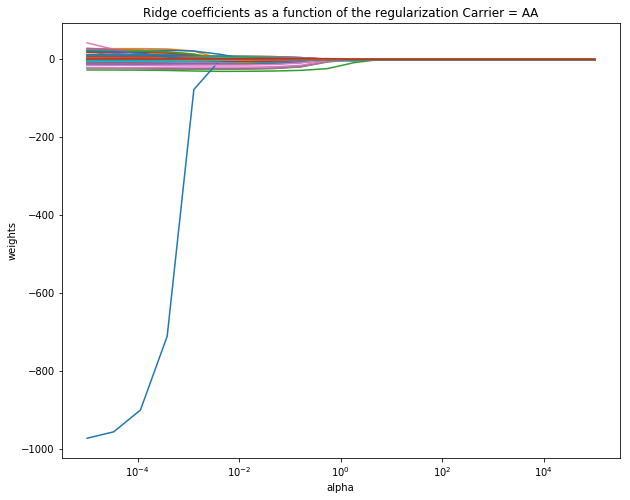

In [265]:
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,Lcoefs_AA)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier = AA')
plt.axis('tight')
plt.show()

### Carrier: DL => Scaling, split in Training and Test set

In [266]:
df_DL = dico_carrier_df["DL"]

In [267]:
# X : we don't keep UNIQUE_CARRIER nor ARR_DELAY 
X_features_dense = df_DL.iloc[:,:-2]

In [268]:
X_features = sparse_df(X_features_dense)
y_features = df_DL['ARR_DELAY'].values

#### Creating Training and Test set

In [269]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2)

In [270]:
# Need to scale the NUMERICAL data on the TRAINING set ONLY
X_train_numerical = X_train[:, -1].toarray()  # before scaling, we need to convert to a dense matrix
X_test_numerical = X_test[:, -1].toarray()

#### Standadizing the data

> - Scale the numerical data, on the **TRAINING SET ONLY**
> - Reconvert afterwards to numerical data to sparse matrix
> - Scaler is only fit to the training data

In [271]:

from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler() # create scaler object
scaler.fit(X_train_numerical) # fit with the training data ONLY
X_train_numerical = sparse.csr_matrix(scaler.transform(X_train_numerical)) # Transform the data and convert to sparse
X_test_numerical = sparse.csr_matrix(scaler.transform(X_test_numerical))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [272]:
# replacing the numerical column (corresponding to DISTANCE) with the scaled values
X_train[:, -1] = X_train_numerical
X_test[:, -1] = X_test_numerical

<a id='model_training_WN'></a>
## Model training - Carrier : DL

> First step is to realize a classical linear regression, in order to compute a baseline error that we'll try to improve through regularisation technics

In [273]:
# classical linear regression to have a comparaison
from sklearn import linear_model
# creation of linear regression model
lr = linear_model.LinearRegression()
# training this model with training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Baseline error

In [274]:
# average of the quadratic errors on the test data
import numpy as np
# Computing the norm 2 error on the test data as baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
print(baseline_error)

5990.090559980772


### Ridge regression

In [275]:
# we'll test on different alpha's
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)

from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs_DL = []
errors_DL = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_DL.append(ridge.coef_)
    errors_DL.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

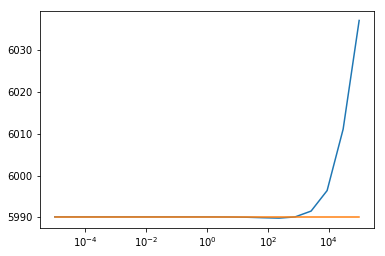

In [276]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, errors_DL, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.show();

In [277]:
# Find the alpha associated to the lowest error
print(min(errors_DL))
print(np.argmin(errors_DL))
print(alphas[np.argmin(errors_DL)])

5989.798155204268
14
233.57214690901213


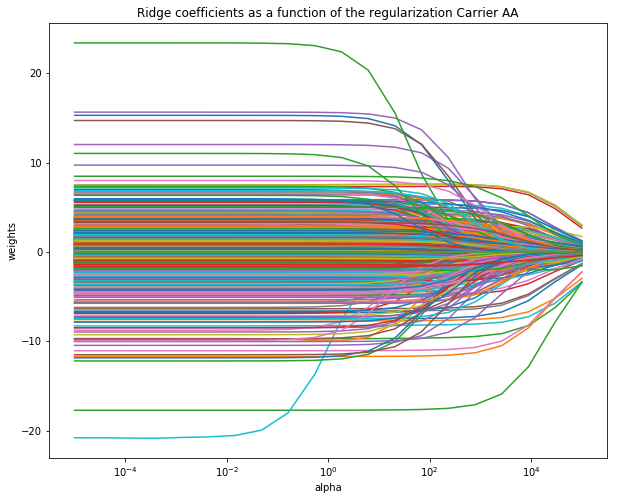

In [278]:
# regularisation paths
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,coefs_DL)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier AA')
plt.axis('tight')
plt.show()

### LASSO

In [279]:
# LASSO
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

Lcoefs_DL = []
Lerrors_DL = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    Lcoefs_DL.append(lasso.coef_)
    Lerrors_DL.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

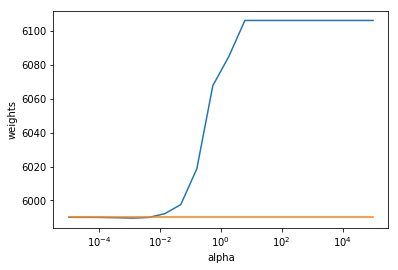

In [280]:
# on observe le comportement de l'erreur
ax = plt.gca()
ax.plot(alphas, Lerrors_DL, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [281]:
Lerrors_DL[np.argmin(Lerrors_DL)]

5989.602738261528

In [282]:
alphas[np.argmin(Lerrors_DL)]

0.0012742749857031334

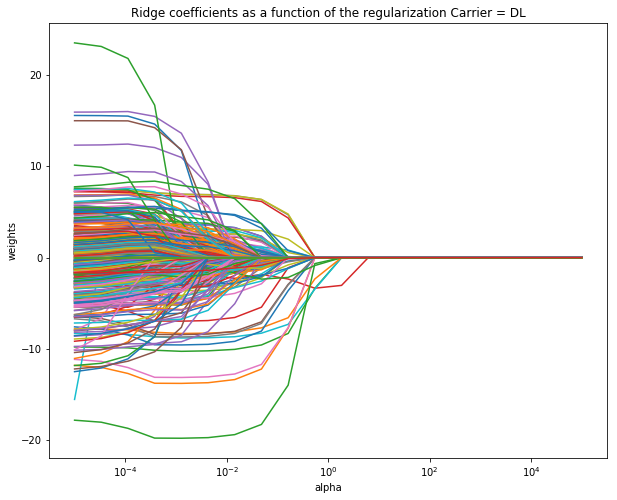

In [283]:
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,Lcoefs_DL)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier = DL')
plt.axis('tight')
plt.show()

### Carrier: WN => Scaling, split in Training and Test set

In [284]:
df_WN = dico_carrier_df["WN"]

In [285]:
# X : we don't keep UNIQUE_CARRIER nor ARR_DELAY 
X_features_dense = df_WN.iloc[:,:-2]

In [286]:
X_features = sparse_df(X_features_dense)
y_features = df_WN['ARR_DELAY'].values

#### Creating Training and Test set

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.2)

In [288]:
# Need to scale the NUMERICAL data on the TRAINING set ONLY
X_train_numerical = X_train[:, -1].toarray()  # before scaling, we need to convert to a dense matrix
X_test_numerical = X_test[:, -1].toarray()

#### Standadizing the data

> - Scale the numerical data, on the **TRAINING SET ONLY**
> - Reconvert afterwards to numerical data to sparse matrix
> - Scaler is only fit to the training data

In [289]:

from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler() # create scaler object
scaler.fit(X_train_numerical) # fit with the training data ONLY
X_train_numerical = sparse.csr_matrix(scaler.transform(X_train_numerical)) # Transform the data and convert to sparse
X_test_numerical = sparse.csr_matrix(scaler.transform(X_test_numerical))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [298]:
# replacing the numerical column (corresponding to DISTANCE) with the scaled values
X_train[:, -1] = X_train_numerical
X_test[:, -1] = X_test_numerical

<a id='model_training_WN'></a>
## Model training - Carrier : WN

> First step is to realize a classical linear regression, in order to compute a baseline error that we'll try to improve through regularisation technics

In [299]:
# classical linear regression to have a comparaison
from sklearn import linear_model
# creation of linear regression model
lr = linear_model.LinearRegression()
# training this model with training data
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Baseline error

In [300]:
# average of the quadratic errors on the test data
import numpy as np
# Computing the norm 2 error on the test data as baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
print(baseline_error)

13000.574146891066


### Ridge regression

In [301]:
# we'll test on different alpha's
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)

from sklearn.linear_model import Ridge
ridge = linear_model.Ridge()

coefs_WN = []
errors_WN = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs_WN.append(ridge.coef_)
    errors_WN.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

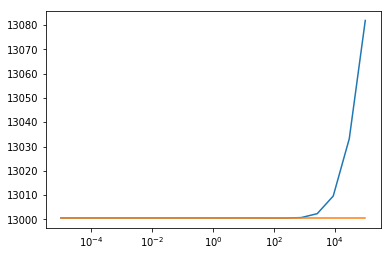

In [302]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.plot(alphas, errors_WN, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.show();

In [306]:
# Find the alpha associated to the lowest error
print(min(errors_WN))
print(np.argmin(errors_WN))
print(alphas[np.argmin(errors_WN)])

13000.51971110515
14
233.57214690901213


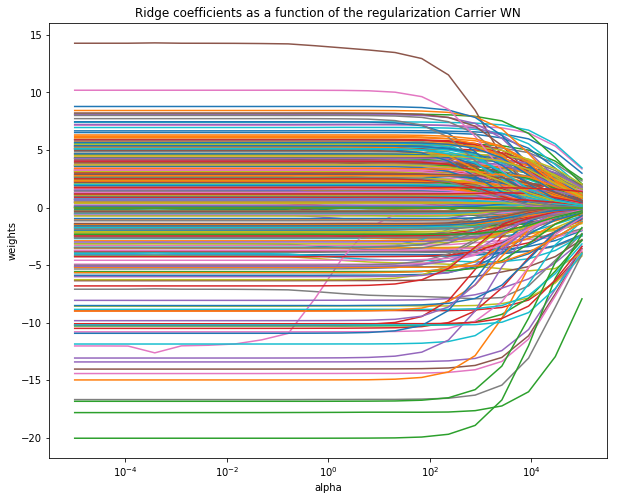

In [307]:
# regularisation paths
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,coefs_WN)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier WN')
plt.axis('tight')
plt.show()

### LASSO

In [308]:
# LASSO
n_alphas = 20
alphas = np.logspace(-5, 5, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

Lcoefs_WN = []
Lerrors_WN = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    Lcoefs_WN.append(lasso.coef_)
    Lerrors_WN.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

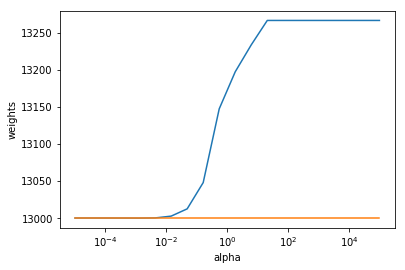

In [309]:
# on observe le comportement de l'erreur
ax = plt.gca()
ax.plot(alphas, Lerrors_WN, [10**-5,10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

In [310]:
Lerrors_WN[np.argmin(Lerrors_WN)]

13000.462478301208

In [311]:
alphas[np.argmin(Lerrors_WN)]

0.0012742749857031334

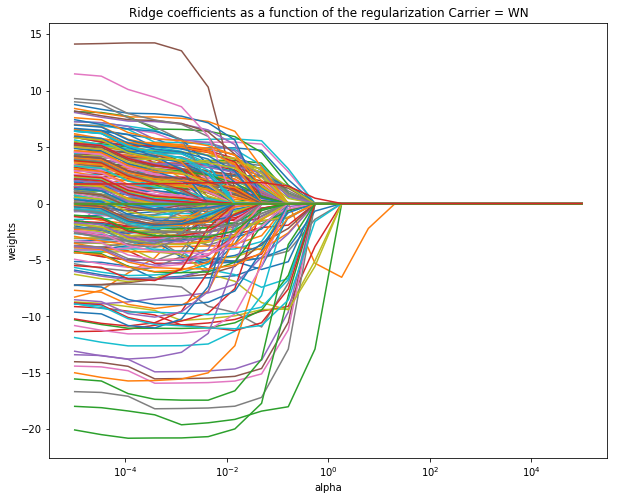

In [312]:
plt.figure(figsize = [10,8])
ax = plt.gca()
ax.plot(alphas,Lcoefs_WN)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization Carrier = WN')
plt.axis('tight')
plt.show()